In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random as rm

# l’installation de données

In [4]:
data1=yf.download(['AAPL','AMZN','NVDA','TSLA'],start='2018-01-01')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [6]:
data1

Ticker,AAPL,AMZN,NVDA,TSLA
Date,,,,
2018-01-02,40.568920,59.450500,4.930222,21.368668
2018-01-03,40.561867,60.209999,5.254698,21.150000
2018-01-04,40.750271,60.479500,5.282397,20.974667
2018-01-05,41.214233,61.457001,5.327160,21.105333
2018-01-08,41.061146,62.343498,5.490389,22.427334
...,...,...,...,...
2024-09-09,220.910004,175.399994,106.460892,216.270004
2024-09-10,220.110001,179.550003,108.090752,226.169998
2024-09-11,222.660004,184.520004,116.900002,228.130005


In [8]:
data1.isnull().sum()


Ticker
AAPL    0
AMZN    0
NVDA    0
TSLA    0
dtype: int64

Nous n’avons aucune valeur nulle dans nos données

<Axes: xlabel='Date'>

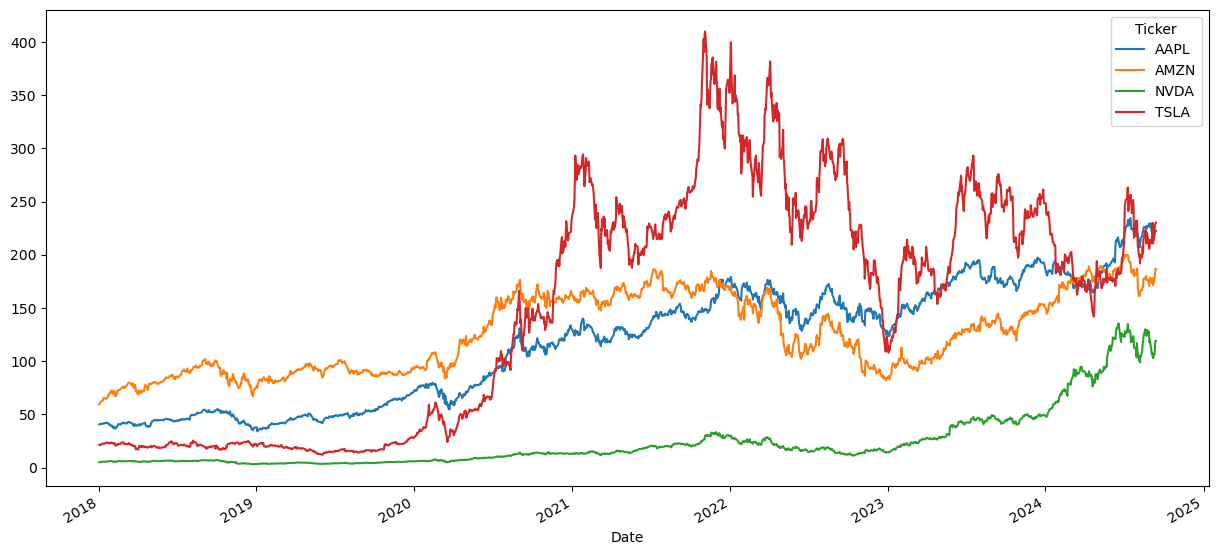

In [11]:
data1.plot(figsize=(15,7))

La variation de prix de chaque action

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>],
       [<Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

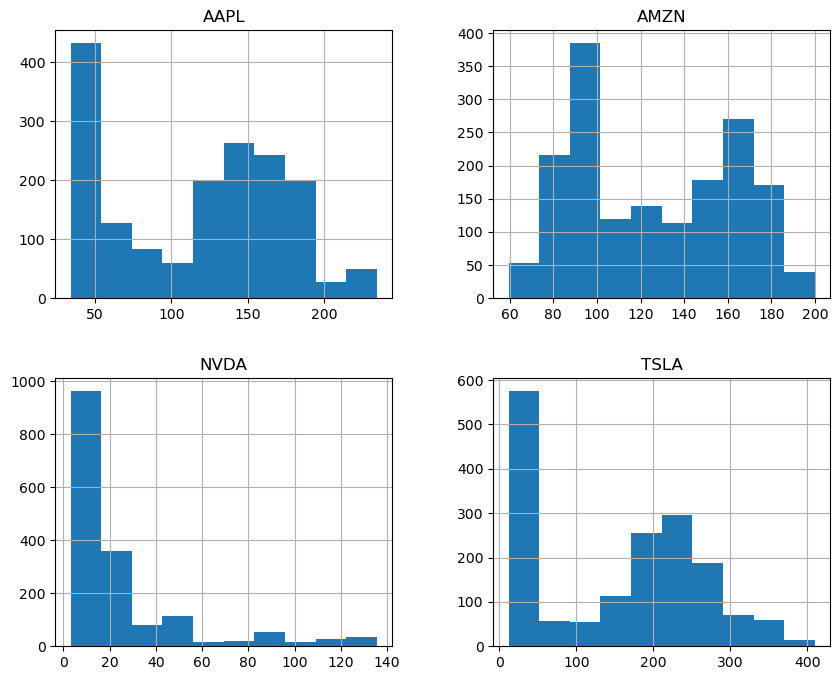

In [14]:
data1.hist(bins=10, figsize=(10, 8))


La distribution des prix de chaque action

In [17]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)
df_scaled

Ticker,AAPL,AMZN,NVDA,TSLA
0,-1.381958,-1.834693,-0.680389,-1.193974
1,-1.382085,-1.813773,-0.668924,-1.195984
2,-1.378703,-1.806349,-0.667945,-1.197595
3,-1.370376,-1.779424,-0.666364,-1.196394
4,-1.373123,-1.755006,-0.660596,-1.184247
...,...,...,...,...
1681,1.854897,1.359097,2.907160,0.596895
1682,1.840538,1.473407,2.964751,0.687862
1683,1.886307,1.610304,3.276022,0.705872
1684,1.888281,1.678615,3.355172,0.721309


la standardisation est appliquée afin de mieux évaluer la volatilité

<Axes: >

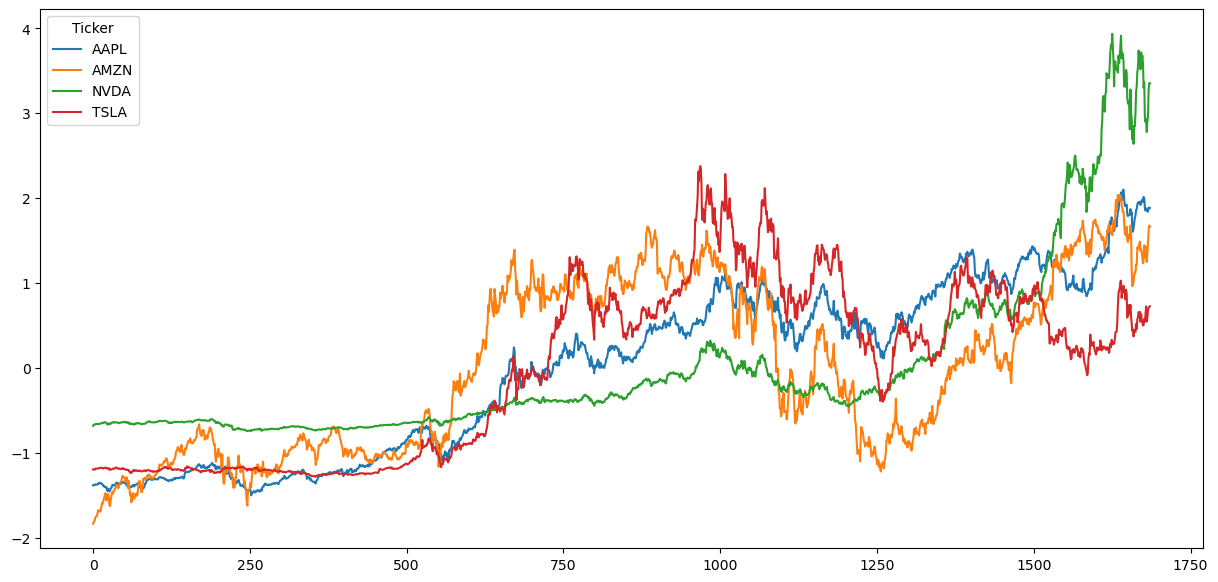

In [20]:
df_scaled.plot(figsize=(15,7))

On peut constater que le prix de l'action Nvidia et tesla et amazon  sont plus volatile par rapport aux Apple

# return

In [24]:
data1return=(data1/data1.shift(1) -1)
data1return

Ticker,AAPL,AMZN,NVDA,TSLA
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.065814,-0.010233
2018-01-04,0.004645,0.004476,0.005271,-0.008290
2018-01-05,0.011386,0.016163,0.008474,0.006230
2018-01-08,-0.003714,0.014425,0.030641,0.062638
...,...,...,...,...
2024-09-09,0.000408,0.023397,0.035398,0.026290
2024-09-10,-0.003621,0.023660,0.015309,0.045776
2024-09-11,0.011585,0.027680,0.081499,0.008666


en calcule les return :    
$return = (return (t)-return(t-1))/return(t-1)$

<Axes: xlabel='Date'>

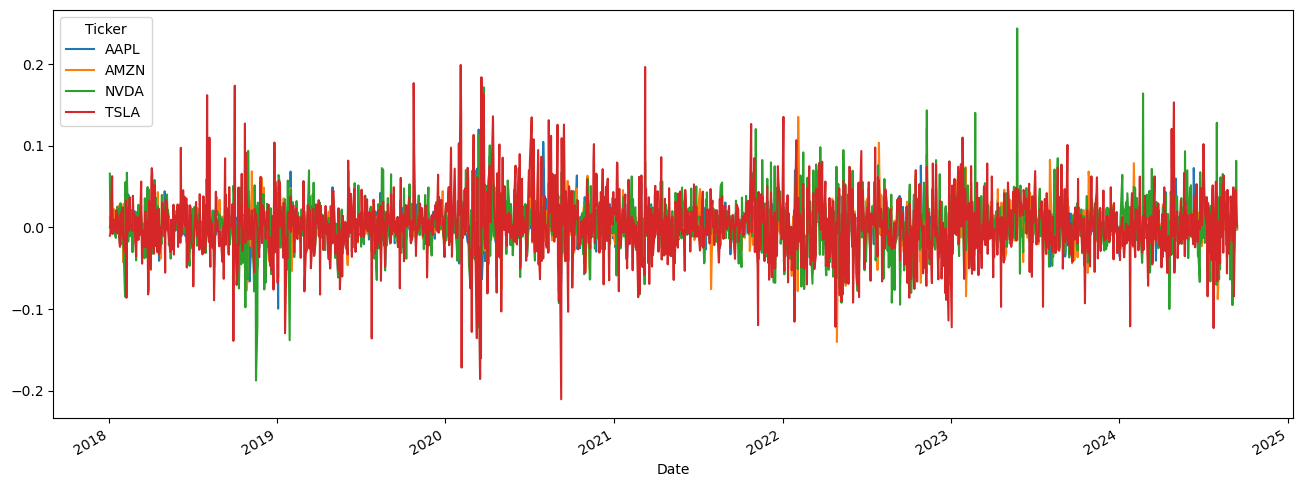

In [27]:
data1return.plot(figsize=(16,6))

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>],
       [<Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

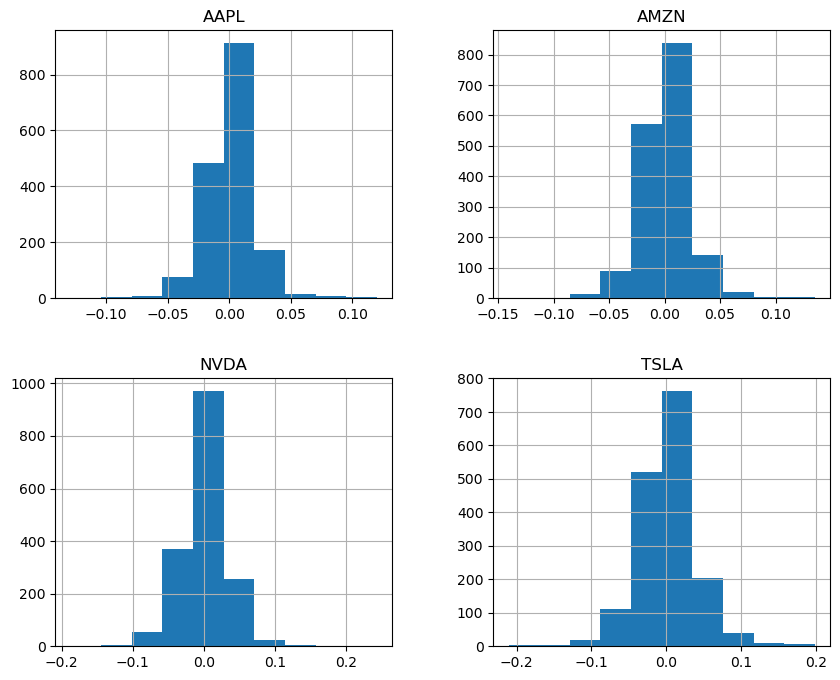

In [29]:

data1return.hist(bins=10, figsize=(10, 8))



La distribution des rendements présente des queues épaisses et n'est pas normalement distribuée.

# logreturn

In [33]:
log_ret=np.log(data1/data1.shift(1))
log_ret

Ticker,AAPL,AMZN,NVDA,TSLA
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012694,0.063739,-0.010286
2018-01-04,0.004634,0.004466,0.005257,-0.008325
2018-01-05,0.011321,0.016033,0.008438,0.006210
2018-01-08,-0.003721,0.014322,0.030181,0.060755
...,...,...,...,...
2024-09-09,0.000407,0.023127,0.034786,0.025950
2024-09-10,-0.003628,0.023385,0.015193,0.044759
2024-09-11,0.011519,0.027304,0.078348,0.008629


$return = log(return(t)/return(t-1))$

<Axes: xlabel='Date'>

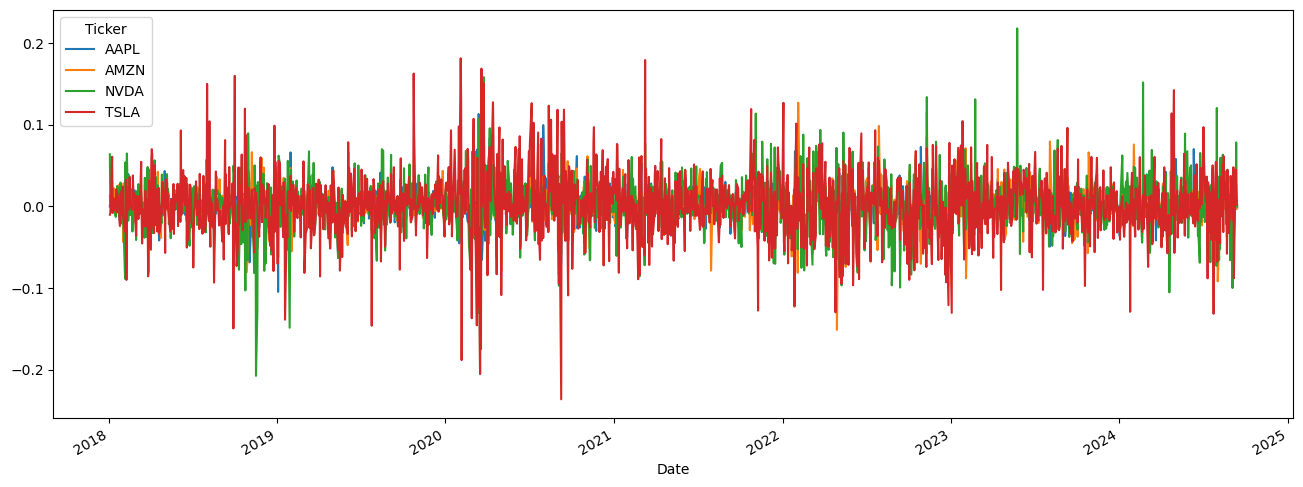

In [36]:
log_ret.plot(figsize=(16,6))

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>],
       [<Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

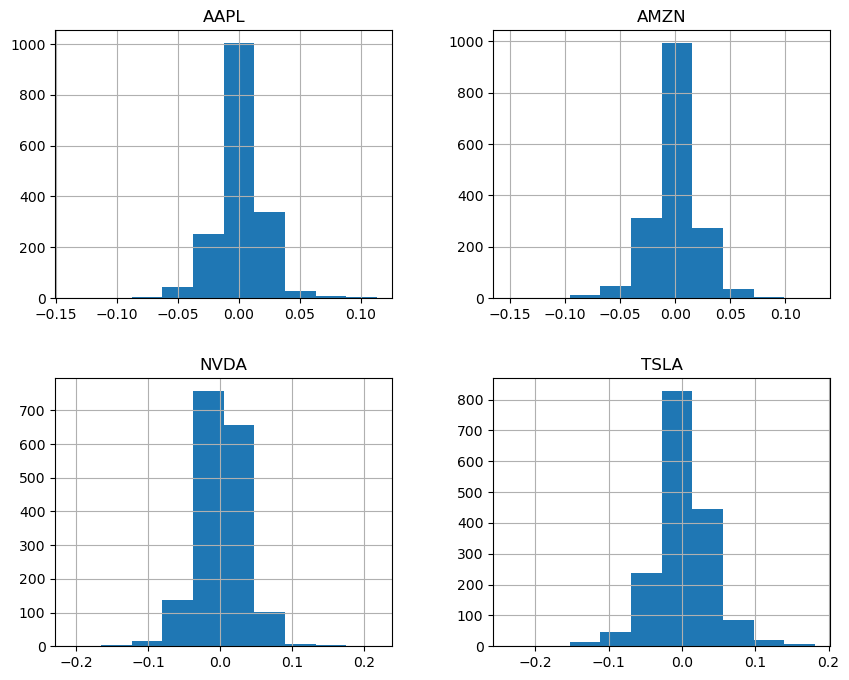

In [37]:
log_ret.hist(bins=10, figsize=(10, 8))


La distribution des rendements présente des queues épaisses et n'est pas normalement distribuée.

In [47]:
N=len(data1.columns)
N

4

In [49]:

def calculat_weights(N):
    weights=np.random.random(N)
    return weights/sum(weights)
weights = calculat_weights(N)

In [51]:
sum(weights)

1.0

In [53]:
log_ret.mean() 
#la moyenne des returns

Ticker
AAPL    0.001010
AMZN    0.000678
NVDA    0.001890
TSLA    0.001411
dtype: float64

In [55]:
def portfolio_return (log_ret,weights):
    return  np.sum(log_ret.mean()*weights) * 252


In [57]:
portfolio_return(log_ret,weights)

0.2891727797220628

In [59]:
cov_return=log_ret.cov()
#covariance des return
cov_return

Ticker,AAPL,AMZN,NVDA,TSLA
Ticker,,,,
AAPL,0.000380,0.000258,0.000386,0.000361
AMZN,0.000258,0.000477,0.000427,0.000362
NVDA,0.000386,0.000427,0.001074,0.000589
TSLA,0.000361,0.000362,0.000589,0.001580


In [61]:
def portfolio_risque(cov_return ,weights ):
    cov=np.dot(cov_return*252,weights)
    vol=np.dot(weights.transpose(),cov)
    return np.sqrt(vol)
#risque de portfeuille 

In [63]:
portfolio_risque(cov_return,weights)

0.32417327928055634

In [65]:
mc_returns=[]
mc_vol=[]
mc_weights=[]
for i in range(10000):
    weights=calculat_weights(N)
    mc_weights.append(weights) 
    p_return=portfolio_return(log_ret,weights)
    mc_returns.append(p_return)
    p_volatility=portfolio_risque(cov_return,weights)
    mc_vol.append(p_volatility)

len(mc_returns)  

10000

In [66]:
mc_sharperatios=np.array(mc_returns)/np.array(mc_vol)
mc_sharperatios

array([0.90363652, 0.84851668, 0.94947121, ..., 0.90679664, 0.82987428,
       0.90053358])

Le ratio de Sharpe est une mesure utilisée en finance pour évaluer la performance ajustée au risque d'un portefeuille ou d'un actif. Il compare le rendement excédentaire d'un portefeuille (par rapport à un actif sans risque ou à un benchmark) à la volatilité de ce rendement.
le benchmark a un rendement de 0 

Text(0, 0.5, 'return')

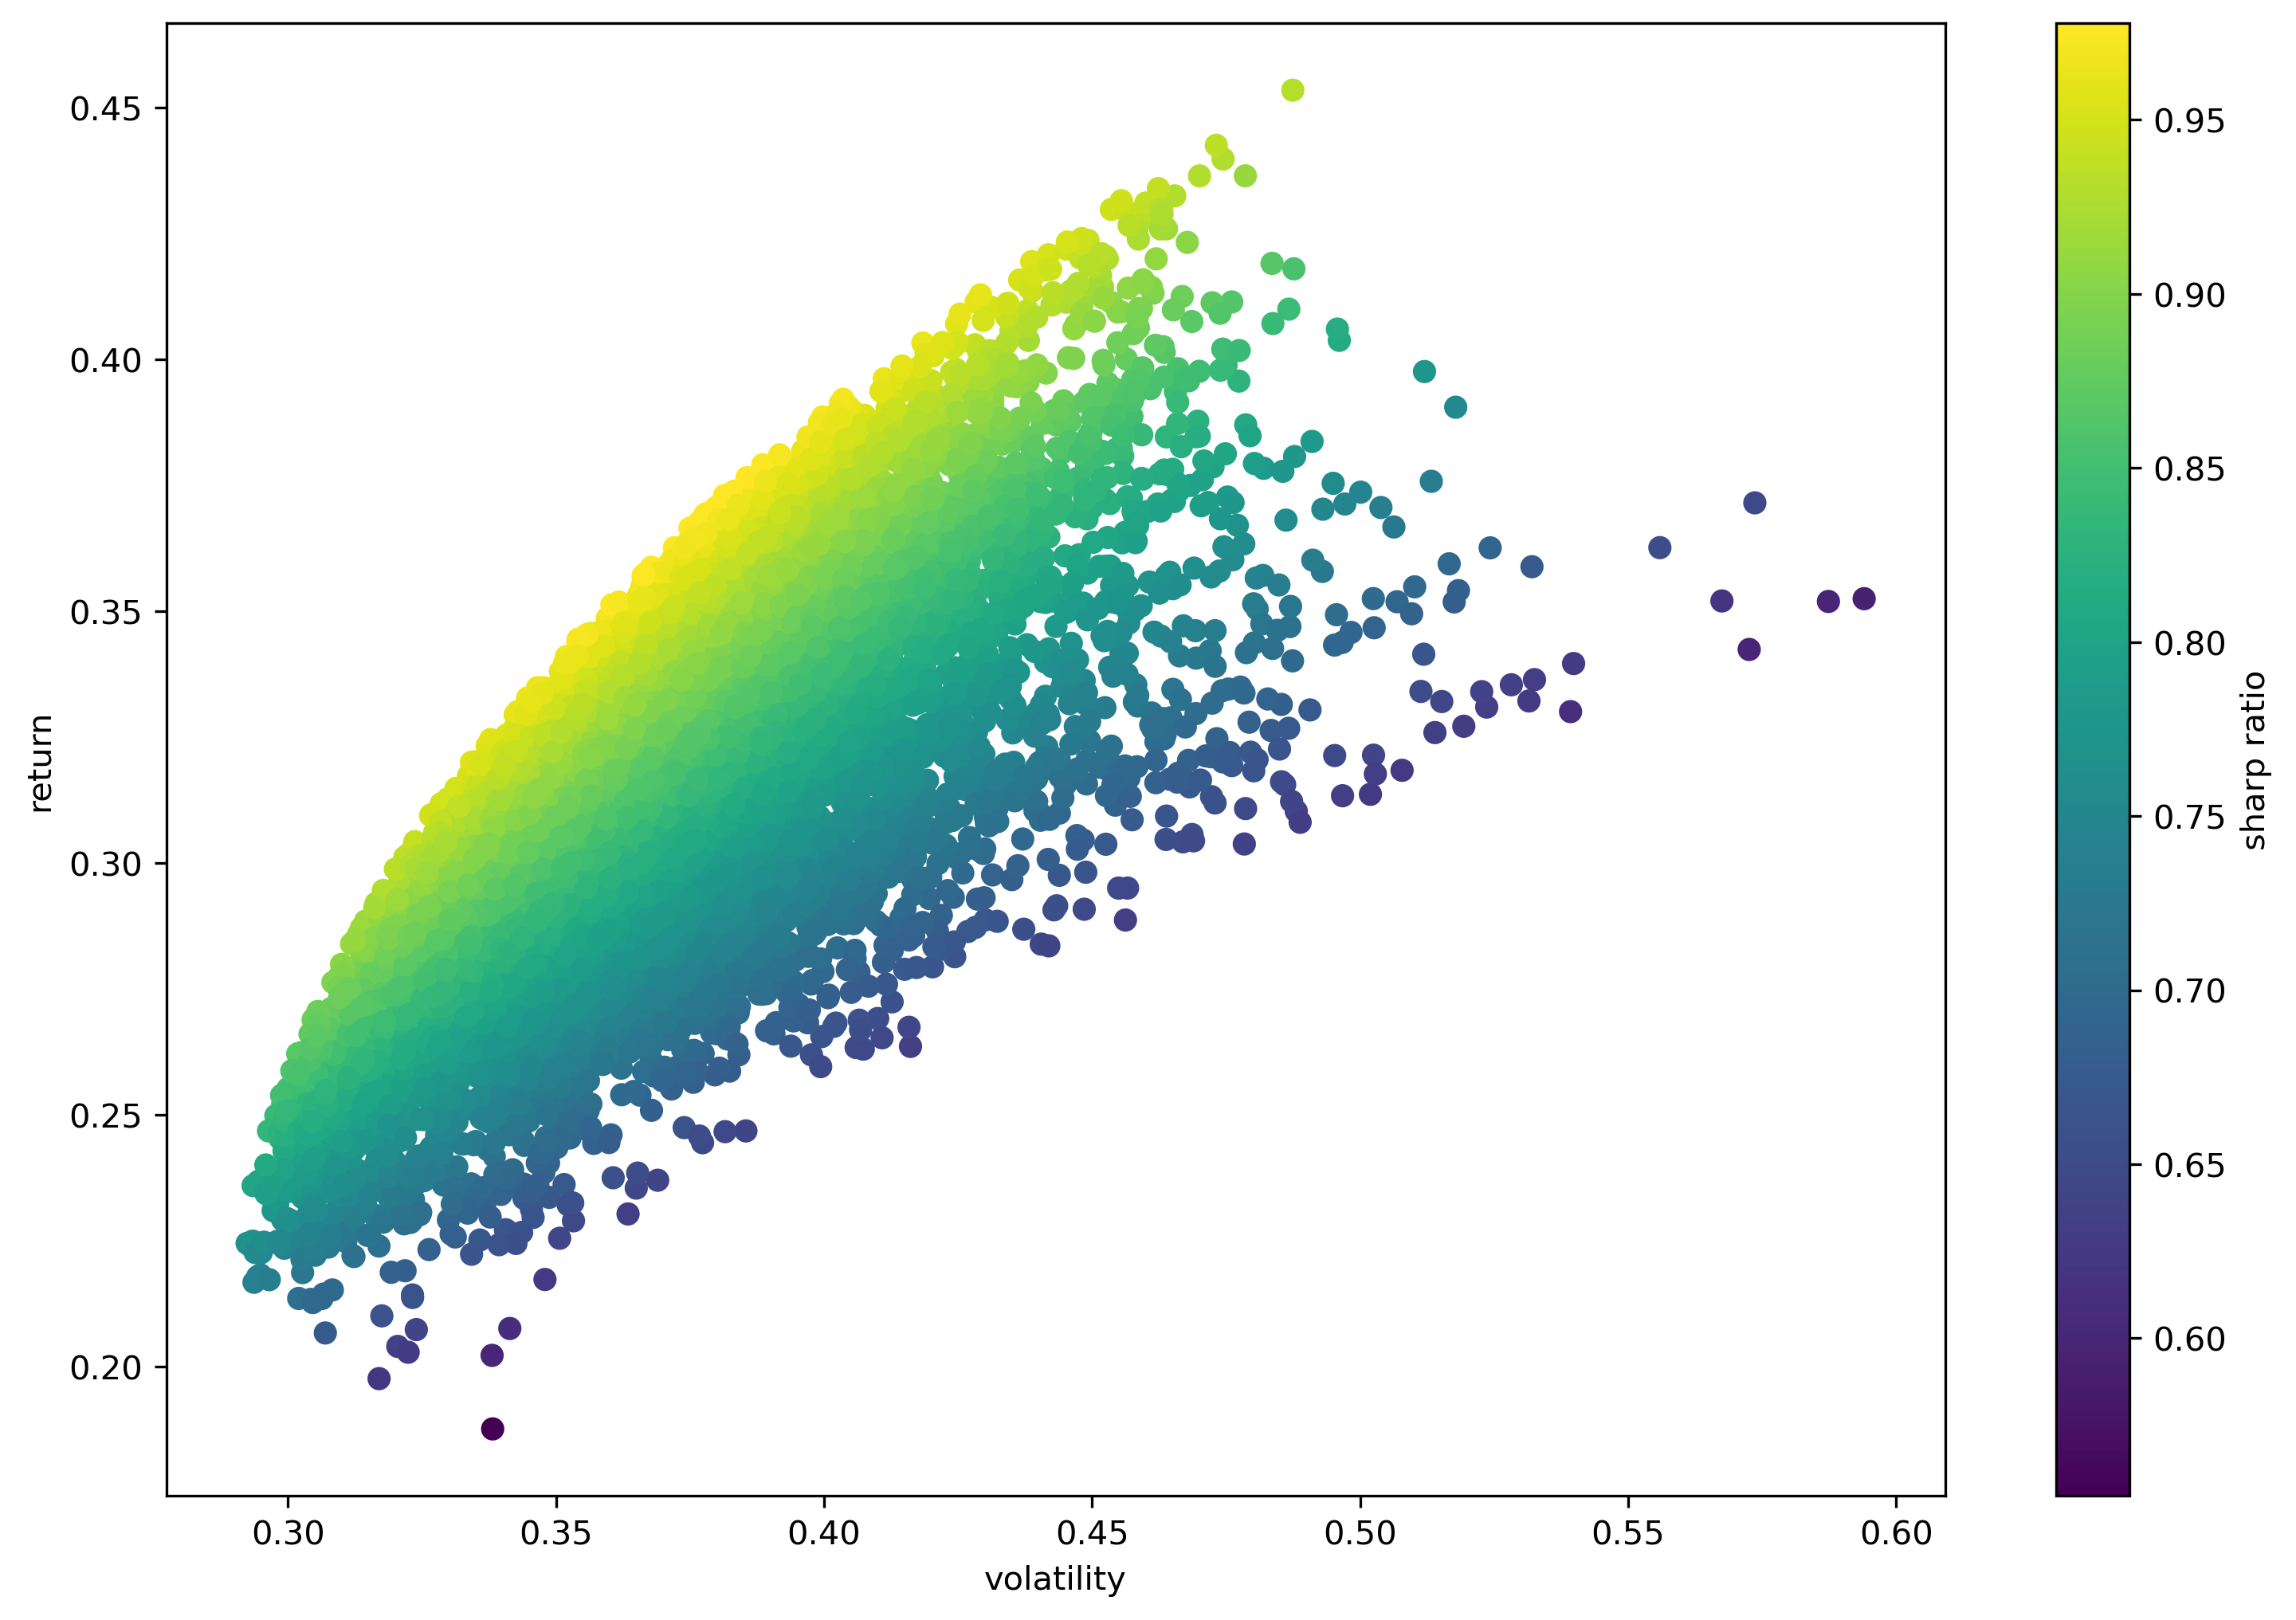

In [68]:
plt.figure( dpi=300,figsize=(12,8))
plt.scatter(mc_vol,mc_returns,c=mc_sharperatios)
plt.colorbar(label="sharp ratio")
plt.xlabel('volatility')
plt.ylabel('return')

In [72]:
tt=np.argmax(mc_sharperatios)

In [74]:
print(f"la meilleure diversification est de {mc_weights[tt]} ")

la meilleure diversification est de [4.38155486e-01 4.89560568e-04 5.11517897e-01 4.98370559e-02] 


In [76]:
 from scipy.optimize import minimize

In [78]:
def fct_min(weights):
    #minimize -1*sharp_ratio
     return -1 *(portfolio_return(log_ret,weights)/portfolio_risque(cov_return,weights))

In [80]:
bounds=tuple((0,1) for i in range(N))
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [82]:
sum_constraint = ({"type":"eq","fun":lambda weights: np.sum(weights)-1})

In [84]:
def equal_weights_fun(N):
    tt=[]
    for i in range(N):
        tt.append(1/N)
    return tt   
equal_weights=equal_weights_fun(N)

In [86]:
minimize(fun=fct_min,x0=equal_weights,bounds=bounds
        ,constraints=sum_constraint)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9788229511307245
       x: [ 4.824e-01  0.000e+00  4.619e-01  5.571e-02]
     nit: 6
     jac: [-1.577e-04  1.537e-01  9.920e-05  5.433e-04]
    nfev: 30
    njev: 6

Selon le modèle de minimisation du risque, la meilleure diversification obtenue est représentée par le vecteur de pondération :
$
(
0.4824
,
0.0000
,
0.4619
,
0.0557
)$
